# Reinforcement Learning

# 3. Online evaluation

This notebook presents the online evaluation of a policy by **Monte-Carlo learning** and **TD learning**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
from model import Maze, Walk, TicTacToe, Nim, ConnectFour
from agent import Agent, OnlineEvaluation
from dynamic import PolicyEvaluation, ValueIteration

## To do

* Complete the class ``MCLearning`` and test it on the random walk.
* Compare with the exact solution obtained by Dynamic Programming.<br> You might plot the [Spearman's correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) between both value functions with respect to the training time.
* Do the same with ``TDLearning``.

## Monte-Carlo learning

In [3]:
class MCLearning(OnlineEvaluation):
    """Online evaluation by Monte-Carlo."""
        
    def update_values(self, state=None, horizon=100):
        """Update the values from one episode."""
        stop, states, rewards = self.get_episode(state=state, horizon=horizon)
        gain = 0
        # backward update
        states.pop()
        for state, reward in zip(reversed(states), reversed(rewards)):
            self.add_state(state)
            code = self.model.encode(state)
            self.count[code] += 1
            # to be modified
            # begin
            gain = self.gamma * gain + reward
            # end 
            diff = gain - self.value[code]
            count = self.count[code]
            self.value[code] += diff / count


## TD learning

In [4]:
class TDLearning(OnlineEvaluation):
    """Online evaluation by TD learning."""
        
    def update_values(self, state=None, horizon=100):
        """Update values online from one episode."""
        self.model.reset(state)
        stop = self.model.is_terminal(state)
        states = [state]
        rewards = []
        if not stop:
            for t in range(horizon):
                state = self.model.state
                if self.model.is_terminal(state):
                    break
                
                action = self.get_action(state)
                reward, stop = self.model.step(action)
                
                next_state = self.model.state
           
               # self.add_state(next_state)
                code = self.model.encode(state)
                code_next = self.model.encode(next_state)
                self.count[code] += 1
               # print(self.value[code])
                
    

                if self.count[code_next] != 0:
                    gain = reward + self.value[code_next] * self.gamma
                else:
                    gain = reward

                diff = gain - self.value[code]
                count = self.count[code]
                self.value[code] += diff / count

## Walk

In [5]:
walk = Walk()

In [6]:
algo = TDLearning(walk, policy='random', gamma=0.9)

In [7]:
n_episodes = 1000
values_td = []
for t in range(n_episodes):
    algo.update_values()
    values_td.append(algo.get_values())

In [8]:
values = algo.get_values()

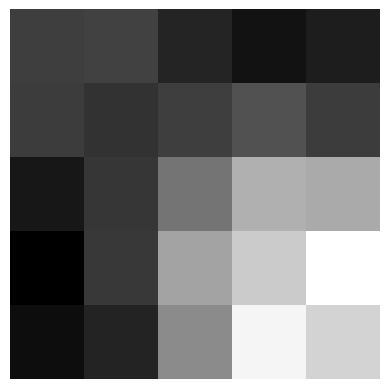

In [9]:
walk.display_values(values)

In [10]:
policy = algo.get_policy()

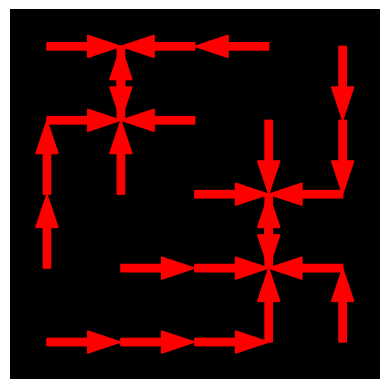

In [11]:
walk.display_policy(policy)

In [12]:
algo = MCLearning(walk, policy='random', gamma=0.9)

In [13]:
n_episodes = 1000
values_mc = []
for t in range(n_episodes):
    algo.update_values()
    values_mc.append(algo.get_values())

In [14]:
values = algo.get_values()

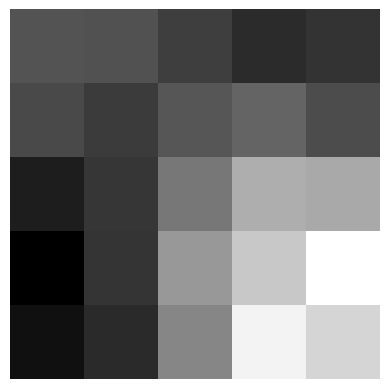

In [15]:
walk.display_values(values)

In [16]:
policy = algo.get_policy()

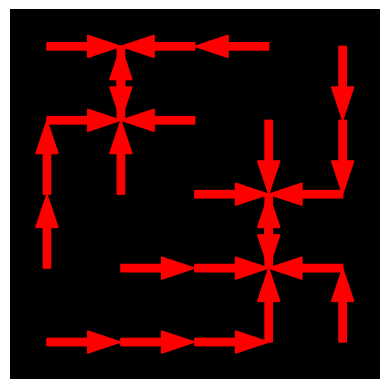

In [17]:
walk.display_policy(policy)

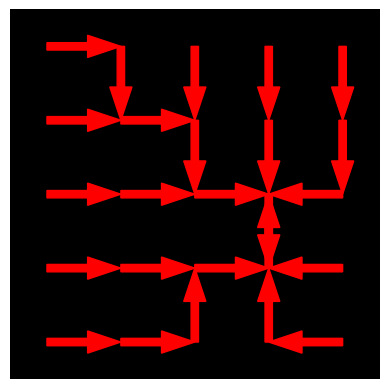

In [18]:
algo = ValueIteration(walk)
policy = algo.get_optimal_policy()
walk.display_policy(policy)

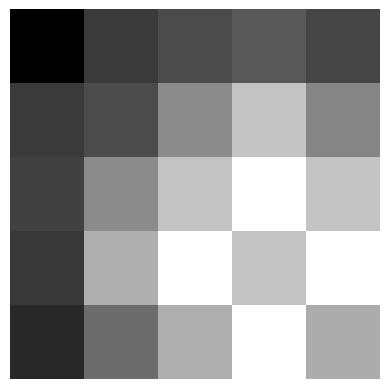

In [19]:
values_d = algo.values
walk.display_values(values_d)

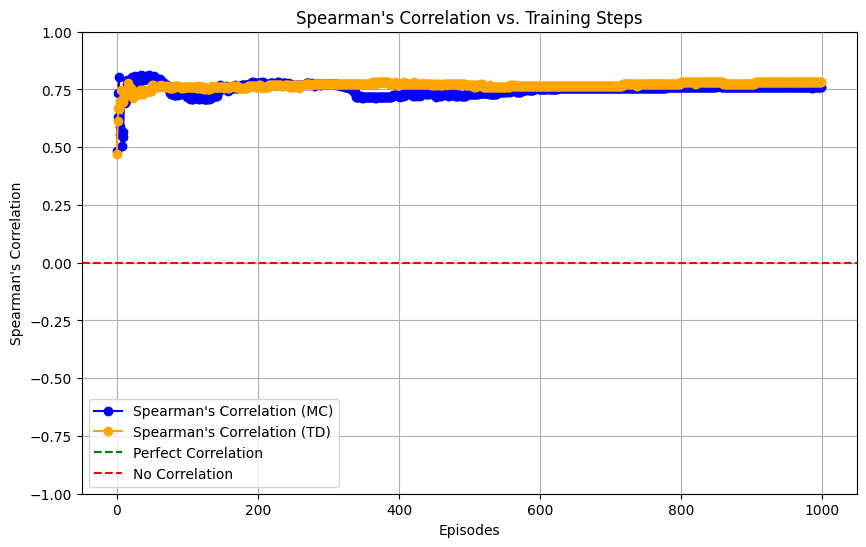

In [20]:
training_steps = range(len(values_mc))

spearman_correlations_mc = [
    spearmanr(v, values_d).correlation for v in values_mc
]

spearman_correlations_td = [
    spearmanr(v, values_d).correlation for v in values_td
]

plt.figure(figsize=(10, 6))
plt.plot(training_steps, spearman_correlations_mc, marker='o', label="Spearman's Correlation (MC)", color='blue')
plt.plot(training_steps, spearman_correlations_td, marker='o', label="Spearman's Correlation (TD)", color='orange')

plt.title("Spearman's Correlation vs. Training Steps")
plt.xlabel("Episodes")
plt.ylabel("Spearman's Correlation")
plt.ylim(-1, 1)
plt.axhline(1, color='green', linestyle='--', label="Perfect Correlation")
plt.axhline(0, color='red', linestyle='--', label="No Correlation")
plt.legend()
plt.grid()

plt.show()



## To do

Test the other environments:
* The maze: can you find the exit after policy improvement?<br> You might adapt the number of episodes used for training.
* The games (Tic-Tac-Toe, Nim, Connect Four): can you beat a random player after policy improvement? a player with the one-step policy?<br> Comment the results.

## Maze

In [21]:
maze_map = np.load('maze.npy')

In [22]:
init_state = (1, 0)
exit_state = (1, 20)
Maze.set_parameters(maze_map, init_state, [exit_state])

In [23]:
maze = Maze()

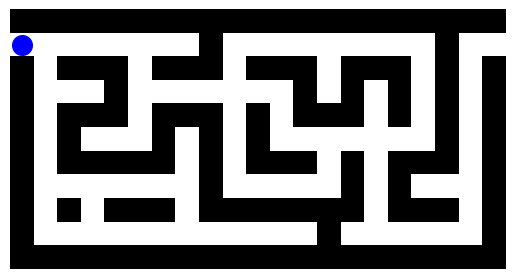

In [24]:
maze.display()

In [52]:
algo = MCLearning(maze, policy='random')

In [53]:
n_episodes = 1000
values_mc = []
for t in range(n_episodes):
    algo.update_values(state='random')
    values_mc.append(algo.get_values())

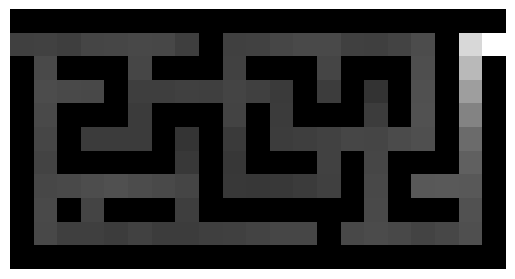

In [56]:
values = algo.get_values()
maze.display_values(values)

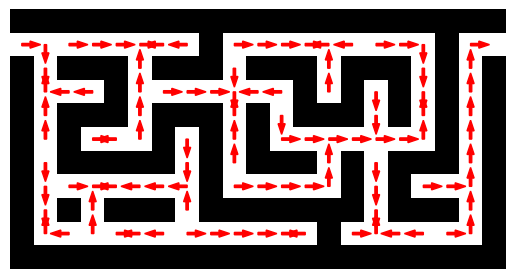

In [57]:
policy = algo.get_policy()
maze.display_policy(policy)

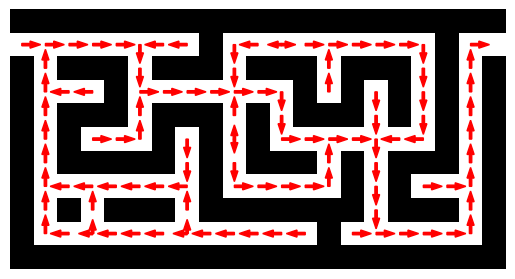

In [30]:
algo = ValueIteration(maze)
policy = algo.get_optimal_policy()
maze.display_policy(policy)

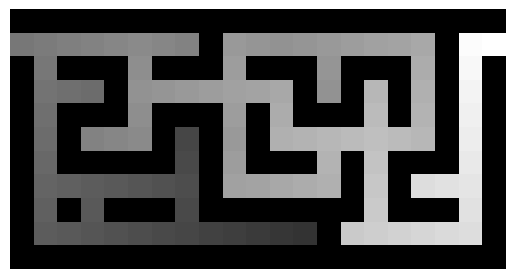

In [31]:
values_d = algo.values
maze.display_values(values_d)

In [58]:
algo = TDLearning(maze, policy='random')

In [33]:
init_state = (1, 0)
exit_state = (1, 20)
Maze.set_parameters(maze_map, init_state, [exit_state])

In [34]:
maze = Maze()

In [59]:
n_episodes = 1000
values_td = []
for t in range(n_episodes):
    algo.update_values(state='random')
    values_td.append(algo.get_values())

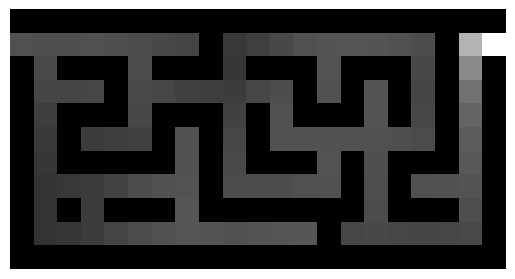

In [60]:
values = algo.get_values()
maze.display_values(values)

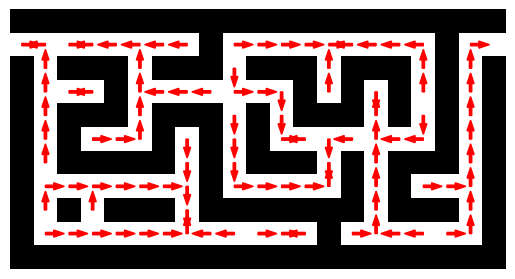

In [61]:
policy = algo.get_policy()
maze.display_policy(policy)

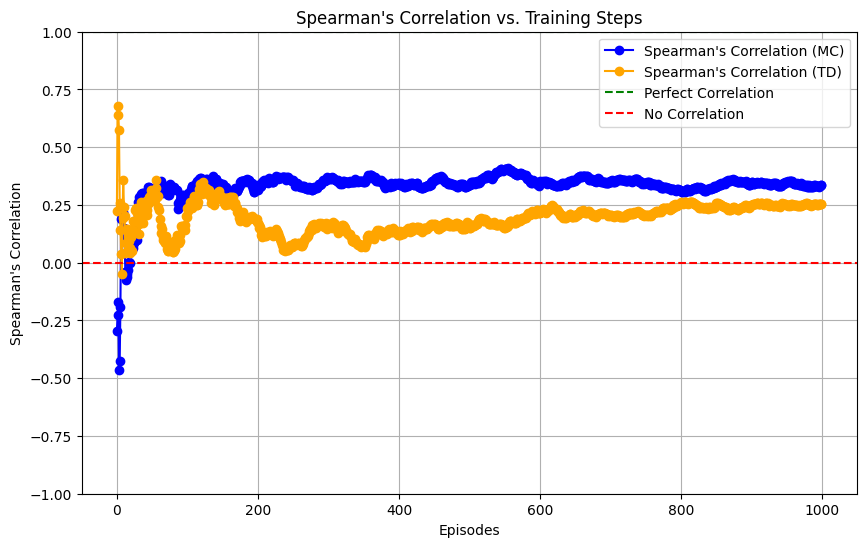

In [62]:
training_steps = range(len(values_mc))

spearman_correlations_mc = [
    spearmanr(v, values_d).correlation for v in values_mc
]

spearman_correlations_td = [
    spearmanr(v, values_d).correlation for v in values_td
]

plt.figure(figsize=(10, 6))
plt.plot(training_steps, spearman_correlations_mc, marker='o', label="Spearman's Correlation (MC)", color='blue')
plt.plot(training_steps, spearman_correlations_td, marker='o', label="Spearman's Correlation (TD)", color='orange')

plt.title("Spearman's Correlation vs. Training Steps")
plt.xlabel("Episodes")
plt.ylabel("Spearman's Correlation")
plt.ylim(-1, 1)
plt.axhline(1, color='green', linestyle='--', label="Perfect Correlation")
plt.axhline(0, color='red', linestyle='--', label="No Correlation")
plt.legend()
plt.grid()

plt.show()

In maze environments, MC learning suffers due to delayed rewards and high variance in updates, while TD learning struggles with bootstrapping errors and local optima. Both face challenges with exploration and the large state space. 

## Games

In [63]:
game = TicTacToe()

In [64]:
Game = TicTacToe

In [65]:
algo = MCLearning(game, policy='random')

In [69]:
n_episodes = 10
values_mc = []
for t in range(n_episodes):
    algo.update_values()
    values_mc.append(algo.get_values())

In [70]:
policy = algo.get_policy()

In [71]:
game = Game(adversary_policy="random")
agent = Agent(game, policy=policy)

In [72]:
stop, states, rewards = agent.get_episode()

In [73]:
rewards

[0, 0, 0, 0, 1]

In [74]:
game = Game(adversary_policy="one_step")
agent = Agent(game, policy=policy)

In [75]:
stop, states, rewards = agent.get_episode()

In [76]:
rewards

[0, 0, 0, 0, 0, 0, 1]

In [77]:
# random player
Game = Nim
game = Game()

In [78]:
algo = MCLearning(game, policy='random')

In [89]:
n_episodes = 100
values_mc = []
for t in range(n_episodes):
    algo.update_values()
    values_mc.append(algo.get_values())

In [90]:
policy = algo.get_policy()

In [91]:
game = Game(adversary_policy="random")
agent = Agent(game, policy=policy)

In [92]:
stop, states, rewards = agent.get_episode()

In [93]:
rewards

[0, 0, 0, 0, 0, 1]

In [94]:
game = Game(adversary_policy="one_step")
agent = Agent(game, policy=policy)

In [95]:
stop, states, rewards = agent.get_episode()

In [96]:
rewards

[0, 0, 0, 0, 0, 0, 0, 1]

In [97]:
Game = ConnectFour
game = Game()
algo = MCLearning(game, policy='random')
n_episodes = 100
for t in range(n_episodes):
    algo.update_values(state=game.init_state())

policy = algo.get_policy()

game = Game(adversary_policy="random")
agent = Agent(game, policy=policy)
stop, states, rewards = agent.get_episode()
print(rewards)

game = Game(adversary_policy="one_step")
agent = Agent(game, policy=policy)
stop, states, rewards = agent.get_episode()
print(rewards)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]


In [99]:
# random player
Game = ConnectFour
game = Game()
algo = MCLearning(game, policy='random')
n_episodes = 1000
for t in range(n_episodes):
    algo.update_values(state=game.init_state())

policy = algo.get_policy()

game = Game(adversary_policy="random")
agent = Agent(game, policy=policy)
stop, states, rewards = agent.get_episode()
print(rewards)

game = Game(adversary_policy="one_step")
agent = Agent(game, policy=policy)
stop, states, rewards = agent.get_episode()
print(rewards)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]


Tic-Tac-Toe and Nim were solved efficiently due to their relatively simple state spaces and clear feedback mechanisms. However, for Connect Four, the combination of a massive state space, sparse rewards, and long-term dependencies made it infeasible to learn a successful policy within the given constraints.

In [193]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([25, 10, 65], dtype=int64))